# Details of the Model

I am using ANN i.e Artificial Neural Network for solving this classification problem, as I have seen the data it has 170 columns and around 7000 rows, means it is a huge data. ANN is a deep learning model where we have multilayers from which the data is passed, and finally we get the desired output. In starting the number of nodes for the ANN are equal to the number of independent variables, and after that for the further hidden layers we have to decide how much nodes we want to keep for the hidden layers. In the starting layers I have used activation function as relu and after that I have used the activation function as sigmoid as I have only two classes in which I have to classify the given data, If I would have classes more than two I would have used the softmax activation function. For the further steps in the preprocessing and modelling I have mentioned the comments for better understanding.

In [0]:
## importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
## importing the dataset
data = pd.read_csv("musk_csv.csv")

In [0]:
## dropped the columns as I have to classify the compounds on the basis of their chemical properties
data = data.drop('ID',axis = 1)
data = data.drop('molecule_name',axis = 1)
data = data.drop('conformation_name',axis = 1)

In [4]:
## printing the first five rows to see if the columns have been dropped
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [5]:
## dividing the data into training and test set
X = data.iloc[:,:166].values
Y = data.iloc[:,-1].values
X

array([[  46, -108,  -60, ...,  -50, -112,   96],
       [  41, -188, -145, ...,  -61, -136,   79],
       [  46, -194, -145, ...,  -67, -145,   39],
       ...,
       [  44, -102,  -19, ...,  -66, -144,   -6],
       [  51, -121,  -23, ...,  -44, -116,  117],
       [  51, -122,  -23, ...,  -44, -115,  118]])

In [0]:
## Splitting the data into 80:20 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [0]:
## Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
!pip install theano

In [9]:
!pip install tensorflow

In [10]:
!pip install keras

In [11]:
import keras

Using TensorFlow backend.


In [0]:
## making the model
from keras.models import Sequential
from keras.layers import Dense

In [0]:
classifier = Sequential()

In [31]:
classifier.add(Dense(output_dim = 80,init = 'uniform', activation='relu',input_dim = 166))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=166, units=80, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [32]:
classifier.add(Dense(output_dim = 80,init = 'uniform', activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [33]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
history = classifier.fit(X_train,Y_train,batch_size = 16,nb_epoch = 30,validation_split = 0.2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 4222 samples, validate on 1056 samples
Epoch 1/30
4222/4222 [==============================] - 1s 281us/step - loss: 0.2653 - acc: 0.8854 - val_loss: 0.1739 - val_acc: 0.9536
Epoch 2/30
4222/4222 [==============================] - 1s 216us/step - loss: 0.1086 - acc: 0.9640 - val_loss: 0.0908 - val_acc: 0.9669
Epoch 3/30
4222/4222 [==============================] - 1s 210us/step - loss: 0.0644 - acc: 0.9787 - val_loss: 0.0781 - val_acc: 0.9763
Epoch 4/30
4222/4222 [==============================] - 1s 219us/step - loss: 0.0479 - acc: 0.9825 - val_loss: 0.0584 - val_acc: 0.9801
Epoch 5/30
4222/4222 [==============================] - 1s 214us/step - loss: 0.0380 - acc: 0.9858 - val_loss: 0.0577 - val_acc: 0.9782
Epoch 6/30
4222/4222 [==============================] - 1s 220us/step - loss: 0.0276 - acc: 0.9910 - val_loss: 0.0414 - val_acc: 0.9848
Epoch 7/30
4222/4222 [==============================] - 1s 225us/step - loss: 0.0207 - acc: 0.9910 - val_loss: 0.0381 - val_acc: 0.9915


In [36]:
##I have got the train accuracy and validation accuracy in the 30th epoch, here I am checking the test accuracy and the loss
classifier.evaluate(x = X_test,y =Y_test)

1320/1320 [==============================] - 0s 46us/step


[0.032593735527419114, 0.9954545454545455]

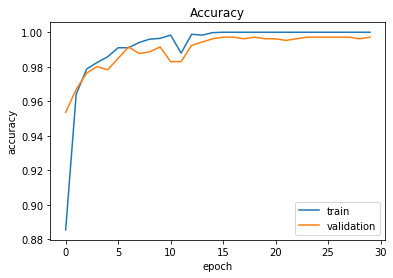

In [37]:
## plotting the accuracy curve
plt.plot(history.history['acc'], label = 'train')
plt.plot(history.history['val_acc'], label = 'validation')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right')
plt.show()

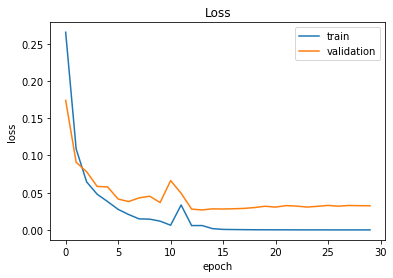

In [38]:
## plotting the loss curve
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.show()

In [43]:
## y_pred
Y_pred = classifier.predict(X_test)

array([[3.8743019e-07],
       [9.9999923e-01],
       [2.3961067e-05],
       ...,
       [1.2508035e-04],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [0]:
Y_pred = Y_pred > 0.5

In [0]:
Y_pred = np.array(Y_pred,dtype = int)

In [56]:
Y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [0]:
## confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)

In [59]:
cm

array([[1117,    3],
       [   3,  197]])

In [0]:
## Accuracy, Precision and the F1 score
Precesion = cm[0][0]/(cm[0][0]+cm[1][0])
Recall = cm[0][0]/(cm[0][0]+cm[0][1])
F1 = (2*Precesion*Recall)/(Precesion+Recall)

In [71]:
print('Precesion = {}, Recall = {}, F1_score = {}'.format(Precesion,Recall,F1))

Precesion = 0.9973214285714286, Recall = 0.9973214285714286, F1_score = 0.9973214285714286
